- Algorithms to sort values in numpy arrays.
- Many types of sorting algos in computer science like:
  insertion sorts, selection sorts, merge sorts, quick sorts, bubble sorts, and many more.

# 1. Selection Sorting

- Repeatedly finds the minimum value from a list and makes swaps until the list is sorted.
- np.argmin(a); returns index of min value in array a.

In [1]:
# In python

import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])  # Find index of minimum value in the remaining list
        (x[i], x[swap]) = (x[swap], x[i])  # Swap the current element with the found minimum
    return x

In [7]:
# In numpy
x = np.array([2, 1, 4, 3, 5])
print(selection_sort(x))

[1 2 3 4 5]


Selection sort is simple but inefficient for large arrays.
  - For a list of $N$ values, it requires $N$ loops, each performing approximately $~N$ comparisons to find the swap value.
  - The average time complexity is $(O(N^2))$. This means if the number of items in the list is doubled, the execution time will increase by about a factor of four.

# 2. Bogosort: A Silly Sorting Algorithm

- This sorting method relies on pure chance: it repeatedly applies a random shuffling of the array until the result happens to be sorted.
- This algorithm has a very poor performance and should never be used for any real computation.

    
- Bogosort has an average time complexity of $(O(N \times N!))$.
- It relies entirely on random shuffling and can take an extremely long time to sort even small arrays.
- Due to its inefficiency, it is not suitable for any practical use.

In [8]:

def bogosort(x):
    while np.any(x[:-1] > x[1:]):  # Check if the array is not sorted
        np.random.shuffle(x)       # Randomly shuffle the array
    return x

x = np.array([2, 1, 4, 3, 5])
print(bogosort(x))
# Output: array([1, 2, 3, 4, 5])


[1 2 3 4 5]


# 3. Efficient Sorting in Python

- Built-in sorting algo in python that are much more effiencient in sorting than above mentioned ones.
  
        1. sort()
        2. sorted()
- But we will see the more efficient rooutines of numpy which work on numpy arrays.

# 4. Fast sorting in Numpy 
1. **np.sort(x)** - To quickly sort x without modifying x.
2. **x.sort()** - To in-place sort the array x.

In [3]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [4]:
x  # x didnt change

array([2, 1, 4, 3, 5])

In [7]:
x.sort()
x   # x changed

array([1, 2, 3, 4, 5])

3. **np.argsort(x)** - Returns indices of sorted elements.
- Used with fancy indexing.

In [10]:
x = np.array([10, 13, 12, 16, 15])
i = np.argsort(x)
i

array([0, 2, 1, 4, 3])

4. **np.sort(x, axis=)** - To sort along specific rows or columns.

- It treats each row and column as independent array.
- It ignores any relationship between rows and columns.
   - axis=0  - Sort Column wise
   - axis=1  - Sort row wise


In [12]:
rand = np.random.RandomState(42)
X = rand.randint(0,10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [13]:
np.sort(X, axis=0)  # sort column wise

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [15]:
np.sort(X, axis=1)  # Sort rows

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# 5. Partial Sorting: Partitioning
- Sometimes we want only k smallest values in an array.

``` python
    np.partition(x, k)
```



In [17]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x,3)


array([2, 1, 3, 4, 6, 5, 7])

- Here. first 3 values are smallest but order of it can be arbitrary.

- Similarly, partition can be used along rows or columns using axis argument.

In [26]:
x = rand.randint(0,20, (6,8))
x

array([[ 6,  8,  0, 11,  7, 10, 18, 16],
       [ 7,  2,  2,  0,  4,  9,  6,  8],
       [ 6,  8,  7, 11,  1,  0, 15,  4],
       [ 2, 11,  7,  2,  0,  2,  4, 14],
       [13,  2,  0,  4, 13,  6,  8, 14],
       [14,  9, 12, 18,  6, 16, 19,  3]])

In [31]:
np.partition(x, 3, axis=0)  # 3 sorted values of each column

array([[ 2,  2,  0,  0,  0,  0,  6,  3],
       [ 6,  8,  0,  2,  1,  2,  4,  4],
       [ 6,  2,  2,  4,  4,  6,  8,  8],
       [ 7,  8,  7, 11,  6,  9, 15, 14],
       [13, 11,  7, 11, 13, 10, 18, 14],
       [14,  9, 12, 18,  7, 16, 19, 16]])

In [32]:
np.partition(x, 3, axis=1) # 3 sorted values of each row

array([[ 6,  0,  7,  8, 10, 11, 18, 16],
       [ 2,  2,  0,  4,  6,  7,  9,  8],
       [ 1,  4,  0,  6,  8,  7, 15, 11],
       [ 0,  2,  2,  2, 11,  7,  4, 14],
       [ 2,  0,  4,  6,  8, 13, 13, 14],
       [ 3,  6,  9, 12, 14, 16, 19, 18]])

# 6. Example: k-Nearest Neighbours

In [53]:
# 10 2D random points
X = rand.rand(10,2)
X

array([[0.28484049, 0.03688695],
       [0.60956433, 0.50267902],
       [0.05147875, 0.27864646],
       [0.90826589, 0.23956189],
       [0.14489487, 0.48945276],
       [0.98565045, 0.24205527],
       [0.67213555, 0.76161962],
       [0.23763754, 0.72821635],
       [0.36778313, 0.63230583],
       [0.63352971, 0.53577468]])

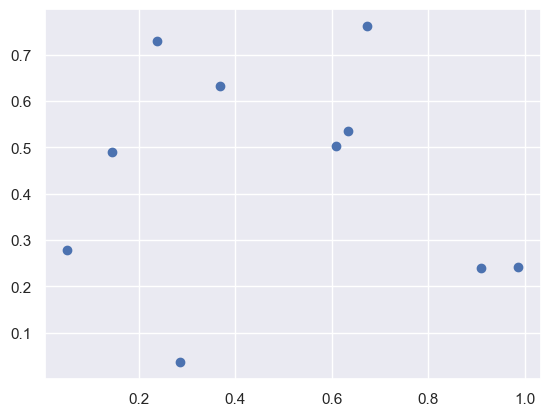

In [54]:
# Scatter plot

import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()

plt.scatter(X[:,0], X[:, 1])


In [63]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) **2, axis=-1)
dist_sq

array([[0.        , 0.32240783, 0.11290537, 0.42973635, 0.22440059,
        0.53322864, 0.6752349 , 0.48016446, 0.36140313, 0.37047314],
       [0.32240783, 0.        , 0.36165011, 0.15845324, 0.21609264,
        0.20936551, 0.07096539, 0.18919662, 0.07526126, 0.00166966],
       [0.11290537, 0.36165011, 0.        , 0.7356118 , 0.05316587,
        0.87401569, 0.61847792, 0.23676818, 0.22512341, 0.40489824],
       [0.42973635, 0.15845324, 0.7356118 , 0.        , 0.64518075,
        0.00599459, 0.3283018 , 0.68852555, 0.44636941, 0.16322198],
       [0.22440059, 0.21609264, 0.05316587, 0.64518075, 0.        ,
        0.76807547, 0.35205753, 0.06560925, 0.07008618, 0.24090973],
       [0.53322864, 0.20936551, 0.87401569, 0.00599459, 0.76807547,
        0.        , 0.3682387 , 0.79587591, 0.53405553, 0.21026011],
       [0.6752349 , 0.07096539, 0.61847792, 0.3283018 , 0.35205753,
        0.3682387 , 0.        , 0.18990429, 0.10935245, 0.05249634],
       [0.48016446, 0.18919662, 0.2367681

- How this works?
  - We have X, we want distance of each node with each node.
  - node1 to node 1
  - node1 to node 2 ...so on to node 10 (total 10 elements in a row)
  - Such 10 rows.
  - i.e. 10x10 matrix
  - See:

In [64]:
X.shape

(10, 2)

In [65]:
X[:, np.newaxis, :] # shape 10,1,2

array([[[0.28484049, 0.03688695]],

       [[0.60956433, 0.50267902]],

       [[0.05147875, 0.27864646]],

       [[0.90826589, 0.23956189]],

       [[0.14489487, 0.48945276]],

       [[0.98565045, 0.24205527]],

       [[0.67213555, 0.76161962]],

       [[0.23763754, 0.72821635]],

       [[0.36778313, 0.63230583]],

       [[0.63352971, 0.53577468]]])

In [66]:
X[np.newaxis, :, :] # shape 1, 10, 2

array([[[0.28484049, 0.03688695],
        [0.60956433, 0.50267902],
        [0.05147875, 0.27864646],
        [0.90826589, 0.23956189],
        [0.14489487, 0.48945276],
        [0.98565045, 0.24205527],
        [0.67213555, 0.76161962],
        [0.23763754, 0.72821635],
        [0.36778313, 0.63230583],
        [0.63352971, 0.53577468]]])

- For each node out of 10 in array of shape(10,1,2), it will subtract all nodes from array of shape (1,10,2).
- It will use broadcasting for this.

In [67]:
dist_sq

array([[0.        , 0.32240783, 0.11290537, 0.42973635, 0.22440059,
        0.53322864, 0.6752349 , 0.48016446, 0.36140313, 0.37047314],
       [0.32240783, 0.        , 0.36165011, 0.15845324, 0.21609264,
        0.20936551, 0.07096539, 0.18919662, 0.07526126, 0.00166966],
       [0.11290537, 0.36165011, 0.        , 0.7356118 , 0.05316587,
        0.87401569, 0.61847792, 0.23676818, 0.22512341, 0.40489824],
       [0.42973635, 0.15845324, 0.7356118 , 0.        , 0.64518075,
        0.00599459, 0.3283018 , 0.68852555, 0.44636941, 0.16322198],
       [0.22440059, 0.21609264, 0.05316587, 0.64518075, 0.        ,
        0.76807547, 0.35205753, 0.06560925, 0.07008618, 0.24090973],
       [0.53322864, 0.20936551, 0.87401569, 0.00599459, 0.76807547,
        0.        , 0.3682387 , 0.79587591, 0.53405553, 0.21026011],
       [0.6752349 , 0.07096539, 0.61847792, 0.3283018 , 0.35205753,
        0.3682387 , 0.        , 0.18990429, 0.10935245, 0.05249634],
       [0.48016446, 0.18919662, 0.2367681

In [69]:
dist_sq.diagonal()  # Represent distance between same nodes.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
nearest = np.argsort(dist_sq, axis=1)
nearest 

array([[0, 2, 4, 1, 8, 9, 3, 7, 5, 6],
       [1, 9, 6, 8, 3, 7, 5, 4, 0, 2],
       [2, 4, 0, 8, 7, 1, 9, 6, 3, 5],
       [3, 5, 1, 9, 6, 0, 8, 4, 7, 2],
       [4, 2, 7, 8, 1, 0, 9, 6, 3, 5],
       [5, 3, 1, 9, 6, 0, 8, 4, 7, 2],
       [6, 9, 1, 8, 7, 3, 4, 5, 2, 0],
       [7, 8, 4, 1, 6, 9, 2, 0, 3, 5],
       [8, 7, 4, 1, 9, 6, 2, 0, 3, 5],
       [9, 1, 6, 8, 3, 7, 5, 4, 0, 2]])

In [75]:
K =2
nearest_partition = np.argpartition(dist_sq, K+1, axis =1)
nearest_partition

array([[2, 0, 4, 1, 8, 9, 3, 7, 5, 6],
       [1, 9, 6, 8, 3, 5, 7, 4, 2, 0],
       [2, 4, 0, 8, 7, 1, 9, 6, 5, 3],
       [3, 5, 1, 9, 6, 0, 2, 7, 8, 4],
       [4, 2, 7, 8, 1, 0, 6, 5, 3, 9],
       [3, 5, 1, 9, 6, 0, 2, 7, 8, 4],
       [1, 6, 9, 8, 3, 7, 4, 5, 2, 0],
       [7, 8, 4, 1, 6, 9, 5, 3, 2, 0],
       [8, 7, 4, 1, 9, 5, 6, 3, 2, 0],
       [9, 1, 6, 8, 3, 5, 7, 4, 2, 0]])

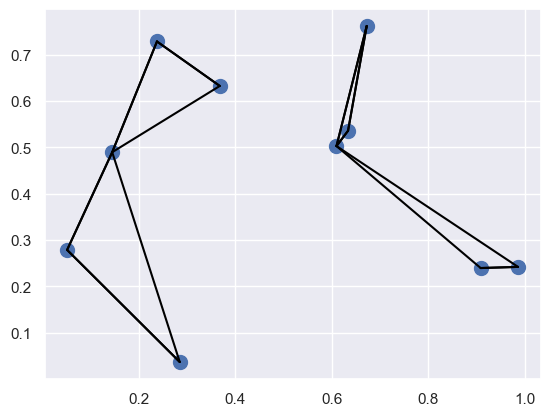

In [79]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color='black')


- Each node has two lines to its nearest node.
- Some has more lines because if A is B is nearest neighbour, it does not mean vice versa.

# Big-O Notation

- Describes how an algorithm's runtime or resource use scales with input size.

- Helps predict performance for large datasets, crucial in data science.

Common Big-O Classifications:

- O(1): Constant time, very fast, independent of input size.
- O(N): Linear time, directly scales with input size.
- O(N²): Quadratic time, performance degrades rapidly as input size increases.
- O(log N): Logarithmic time, very efficient for large datasets.
- O(N log N): Common in efficient sorting algorithms like quicksort and mergesort.

Why It Matters:

- Choosing algorithms with better scaling (e.g., O(N) over O(N²)) can significantly reduce computation time on large datasets.
- Essential for optimizing machine learning models, data processing, and analysis pipelines.

Real-World Relevance:

- For small datasets, algorithms with higher Big-O might still be practical due to lower constant factors.
- For large datasets, scaling differences (like O(N) vs. O(N²)) can be the difference between feasible and impractical computations.
Practical Use:

- Use Big-O to guide initial algorithm selection, but also consider practical factors like implementation, hardware, and actual run times.

- In data science, prioritize algorithms with efficient scaling to handle growing datasets effectively.

Limitations:
- Big-O does not measure exact execution time; it only provides a general trend.
- Other factors like system architecture and implementation quality can impact actual performance.